In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# Metrics
from sklearn.metrics import f1_score
from sklearn.metrics import hamming_loss
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import precision_score
# from sklearn import metrics
# from scipy import sparse

# Check time
import time

# Save model
import joblib

In [151]:
%pip install scikit-multilearn

Note: you may need to restart the kernel to use updated packages.Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com




[notice] A new release of pip available: 22.2.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [152]:
# import nltk
# from nltk.corpus import stopwords
# from nltk.stem.snowball import SnowballStemmer
# import re
#
# nltk.download('stopwords')
#
# # Transform
# from skmultilearn.problem_transform import BinaryRelevance
# from skmultilearn.problem_transform import ClassifierChain
# from skmultilearn.problem_transform import LabelPowerset
#
# # Classifiers
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.svm import SVC
#
# # Vectorize
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_extraction.text import CountVectorizer

In [153]:
from PycharmProjects.PNW.notebooks import models

In [154]:
from PycharmProjects.PNW.notebooks import preprocess

In [155]:
path = 'C:/Users/user/PycharmProjects/PNW/notebooks'

In [156]:
data = pd.read_csv(f'{path}/data/train.csv')
data.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [157]:
all_tags = ['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']
data['Sum'] = data[all_tags].sum(axis=1)

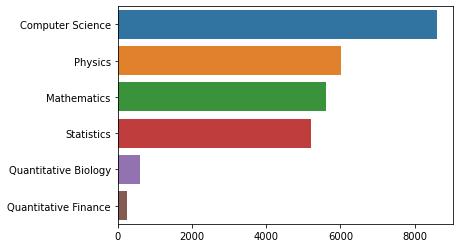

In [158]:
count = {}
for tag in all_tags:
    count[tag] = data[tag].sum(axis=0)
raw_data = {"category":list(count.keys()), "occurances": list(count.values())}

sns.barplot(data=raw_data, x="occurances", y="category",orient="h")
plt.show()

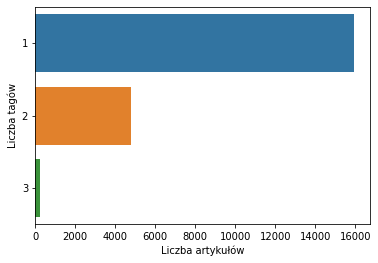

In [159]:
occur = data.groupby(['Sum']).size()
raw_data_tag_count = {"category": list(occur.index), "occurances": occur.to_list()}

sns.barplot(data=raw_data_tag_count, x="occurances", y="category",orient="h")
plt.ylabel('Liczba tagów', fontsize=10)
plt.xlabel('Liczba artykułów', fontsize=10)
plt.show()

In [160]:
data['text'] = data['TITLE'] + ' ' + data['ABSTRACT']
data.drop(columns=['TITLE', 'ABSTRACT', 'Sum'], inplace=True)

In [161]:
data.head()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,text
0,1,1,0,0,0,0,0,Reconstructing Subject-Specific Effect Maps ...
1,2,1,0,0,0,0,0,Rotation Invariance Neural Network Rotation ...
2,3,0,0,1,0,0,0,Spherical polyharmonics and Poisson kernels fo...
3,4,0,0,1,0,0,0,A finite element approximation for the stochas...
4,5,1,0,0,1,0,0,Comparative study of Discrete Wavelet Transfor...


In [162]:
# # Removing HTML tags
# def clean_html(sentence):
#     clean_r = re.compile('<.*?>')
#     clean_text = re.sub(clean_r, ' ', str(sentence))
#     return clean_text
#
#
# # Removing punctuation or special characters
# def clean_punc(sentence):
#     cleaned = re.sub(r'[?|!|\'|"|#]', r'', sentence)
#     cleaned = re.sub(r'[.|,|)|(|\|/]', r' ', cleaned)
#     cleaned = cleaned.strip()
#     cleaned = cleaned.replace("\n", " ")
#     return cleaned
#
#
# # Removing non-alphabetical characters
# def keep_alpha(sentence):
#     alpha_sent = ""
#     for word in sentence.split():
#         alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
#         alpha_sent += alpha_word
#         alpha_sent += " "
#     alpha_sent = alpha_sent.strip()
#     return alpha_sent
#
#
# # Removing stop words
# stop_words = set(stopwords.words('english'))
# stop_words.update(
#     ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'may', 'also', 'across',
#      'among', 'beside', 'however', 'yet', 'within'])
# re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
#
#
# def remove_stop_words(sentence):
#     global re_stop_words
#     return re_stop_words.sub(" ", sentence)
#
#
# # Stemminig words - converting words that mean the same thing to the same word
# stemmer = SnowballStemmer("english")
#
#
# def stemming(sentence):
#     stem_sentence = ""
#     for word in sentence.split():
#         stem = stemmer.stem(word)
#         stem_sentence += stem
#         stem_sentence += " "
#     stem_sentence = stem_sentence.strip()
#     return stem_sentence

In [163]:
data["text"] = data["text"].str.lower()
data['text'] = data['text'].apply(clean_html)
data['text'] = data['text'].apply(clean_punc)
data['text'] = data['text'].apply(keep_alpha)
data['text'] = data['text'].apply(stemming)
data['text'] = data['text'].apply(remove_stop_words)

In [164]:
data.shape

(20972, 8)

In [165]:
data.head()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,text
0,1,1,0,0,0,0,0,reconstruct subject specif effect map predict ...
1,2,1,0,0,0,0,0,rotat invari neural network rotat invari tran...
2,3,0,0,1,0,0,0,spheric polyharmon poisson kernel polyharmon...
3,4,0,0,1,0,0,0,finit element approxim stochast maxwel land...
4,5,1,0,0,1,0,0,compar studi discret wavelet transform wavel...


In [166]:
# tfidf_BR_MNB = Pipeline([
#     ('tfidf', TfidfVectorizer(stop_words='english')),
#     ('clf', BinaryRelevance(MultinomialNB())),
# ])
# tfidf_BR_LR = Pipeline([
#     ('tfidf', TfidfVectorizer(stop_words='english')),
#     ('clf', BinaryRelevance(LogisticRegression(solver='sag'))),
# ])
# tfidf_CC_MNB = Pipeline([
#     ('tfidf', TfidfVectorizer(stop_words='english')),
#     ('clf', ClassifierChain(MultinomialNB())),
# ])
# tfidf_CC_LR = Pipeline([
#     ('tfidf', TfidfVectorizer(stop_words='english')),
#     ('clf', ClassifierChain(LogisticRegression(solver='sag'))),
# ])
# tfidf_LB_MNB = Pipeline([
#     ('tfidf', TfidfVectorizer(stop_words='english')),
#     ('clf',  LabelPowerset(MultinomialNB())),
# ])
# tfidf_LB_LR = Pipeline([
#     ('tfidf', TfidfVectorizer(stop_words='english')),
#     ('clf',  LabelPowerset(LogisticRegression(max_iter=120))),
# ])
# cv_BR_MNB = Pipeline([
#     ('cv', CountVectorizer(stop_words='english')),
#     ('clf', BinaryRelevance(MultinomialNB())),
# ])
# cv_BR_LR = Pipeline([
#     ('cv', CountVectorizer(stop_words='english')),
#     ('clf', BinaryRelevance(LogisticRegression(solver='sag'))),
# ])
# cv_CC_MNB = Pipeline([
#     ('tfidf', CountVectorizer(stop_words='english')),
#     ('clf', ClassifierChain(MultinomialNB())),
# ])
# cv_CC_LR = Pipeline([
#     ('tfidf', CountVectorizer(stop_words='english')),
#     ('clf', ClassifierChain(LogisticRegression(solver='sag'))),
# ])
# cv_LP_MNB = Pipeline([
#     ('tfidf', CountVectorizer(stop_words='english')),
#     ('clf',  LabelPowerset(MultinomialNB())),
# ])
# cv_LP_LR = Pipeline([
#     ('tfidf', CountVectorizer(stop_words='english')),
#     ('clf',  LabelPowerset(LogisticRegression(max_iter=120))),
# ])
# cv_LP_SVC_lin = Pipeline([
#     ('tfidf', CountVectorizer(stop_words='english')),
#     ('clf',  (SVC(kernel='linear', C=1, decision_function_shape='ovo'))),
# ])

In [167]:
# CLASSIFIERS = [
#     tfidf_BR_MNB,
#     tfidf_BR_LR,
#     tfidf_CC_MNB,
#     tfidf_CC_LR,
#     tfidf_LB_MNB,
#     tfidf_LB_LR,
#     cv_BR_MNB,
#     cv_BR_LR,
#     cv_CC_MNB,
#     cv_CC_LR,
#     cv_LP_MNB,
#     cv_LP_LR,
#     cv_LP_SVC_lin
# ]

In [168]:
# CLASSIFIERS_NAMES = [
#     'tfidf_BR_MNB',
#     'tfidf_BR_LR',
#     'tfidf_CC_MNB',
#     'tfidf_CC_LR',
#     'tfidf_LB_MNB',
#     'tfidf_LB_LR',
#     'cv_BR_MNB',
#     'cv_BR_LR',
#     'cv_CC_MNB',
#     'cv_CC_LR',
#     'cv_LP_MNB',
#     'cv_LP_LR',
#     'cv_LP_SVC_lin'
# ]

In [169]:
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
scores = np.zeros(shape=(len(CLASSIFIERS), skf.get_n_splits()))
# scores = np.zeros(shape=(len(CLASSIFIERS), skf.get_n_splits() + 1))

In [170]:
X = data.loc[:, "text"]
y = data.loc[:, all_tags]
X, X_holdout, y, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y.sum(axis=1))

In [ ]:
for classifier_idx, clf_prot in enumerate(CLASSIFIERS):
    best_split_score = -np.inf
    best_model = None
    split_idx = 0

    for train_index, test_index in skf.split(X, y.sum(axis=1)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        clf = clone(clf_prot)
        time_start = time.time()
        clf.fit(X_train, y_train)
        time_end = time.time()
        predictions = clf.predict(X_test)

        score = f1_score(y_test, predictions, average="micro")

        print(f'\n{CLASSIFIERS_NAMES[classifier_idx]} split: {split_idx + 1}')
        print(f'Accuracy = {score}')
        print(f'F1 score = {f1_score(y_test, predictions, average="micro")}')
        print(f'Hamming Loss = {hamming_loss(y_test, predictions)}')
        print(f'Time taken to fit model = {str(time_end - time_start)}')

        if score > best_split_score:
            best_split_score = score
            best_model = clone(clf)

        scores[classifier_idx, split_idx] = score
        split_idx += 1

    # clf_full_data = clone(clf_prot)
    # time_start = time.time()
    # clf_full_data.fit(X, y)
    # time_end = time.time()
    #
    # predictions_full = clf_full_data.predict(X)
    #
    # full_data_score = f1_score(y, predictions_full, average="micro")
    #
    # print(f'\n{CLASSIFIERS_NAMES[classifier_idx]} full data training:')
    # print(f'Accuracy = {full_data_score}')
    # print(f'F1 score = {f1_score(y, predictions_full, average="micro")}')
    # print(f'Hamming Loss = {hamming_loss(y, predictions_full)}')
    # print(f'Time taken to fit full data model = {str(time_end - time_start)}')
    #
    # scores[classifier_idx, -1] = full_data_score

    # if full_data_score > best_split_score:
    #     best_model_filename = f"{CLASSIFIERS_NAMES[classifier_idx]}_full_data_model.joblib"
    #     joblib.dump(clf_full_data, f'{path}/results/{best_model_filename}')
    #     print(f"Best model for {CLASSIFIERS_NAMES[classifier_idx]} is the full data model. Saved as {best_model_filename}")
    # else:
        best_model_filename = f"{CLASSIFIERS_NAMES[classifier_idx]}_{classifier_idx+1}_best_split_model.joblib"
        joblib.dump(best_model, f'{path}/results/{best_model_filename}')
        print(f"Best model for {CLASSIFIERS_NAMES[classifier_idx]} is from the best split. Saved as {best_model_filename}")



tfidf_BR_MNB split: 1
Accuracy = 0.7063854047890535
F1 score = 0.7063854047890535
Hamming Loss = 0.10230433055224473
Time taken to fit model = 12.523815155029297
Best model for tfidf_BR_MNB is from the best split. Saved as tfidf_BR_MNB_1_best_split_model.joblib

tfidf_BR_MNB split: 2
Accuracy = 0.7147952632329863
F1 score = 0.7147952632329863
Hamming Loss = 0.09927493047278506
Time taken to fit model = 10.821575164794922
Best model for tfidf_BR_MNB is from the best split. Saved as tfidf_BR_MNB_1_best_split_model.joblib

tfidf_BR_MNB split: 3
Accuracy = 0.714876622450435
F1 score = 0.714876622450435
Hamming Loss = 0.09930452061599603
Time taken to fit model = 10.66601037979126
Best model for tfidf_BR_MNB is from the best split. Saved as tfidf_BR_MNB_1_best_split_model.joblib

tfidf_BR_MNB split: 4
Accuracy = 0.7110921258721344
F1 score = 0.7110921258721344
Hamming Loss = 0.10079483358171883
Time taken to fit model = 10.878255367279053
Best model for tfidf_BR_MNB is from the best split.

In [ ]:
scores.shape

In [ ]:
np.save("scores", f'{path}/results/{scores}')

In [ ]:
%pip install tabulate

In [ ]:
from tabulate import tabulate
from scipy.stats import ttest_rel

In [ ]:
table = tabulate(scores,
    tablefmt="grid",
    headers=[
        "split 1",
        "split 2",
        "split 3",
        "split 4",
        "split 5",
        "full_data"
    ],
    showindex=[
         'tfidf_BR_MNB',
         'tfidf_BR_LR',
         'tfidf_CC_MNB',
         'tfidf_CC_LR',
         'tfidf_LB_MNB',
         'tfidf_LB_LR',
         'cv_BR_MNB',
         'cv_BR_LR',
         'cv_CC_MNB',
         'cv_CC_LR',
         'cv_LP_MNB',
         'cv_LP_LR',
         'cv_LP_SVC_lin'
    ])
table

In [ ]:
result = []
for classifier_idx in range(scores.shape[0]):
    classifier_result = []
    for compare_classifier_idx in range(scores.shape[0]):
        classifier_result.append(ttest_rel(
            scores[classifier_idx, :],
            scores[compare_classifier_idx, :]
        ))
    result.append(classifier_result)

result_array = np.array(result)

In [ ]:
table_statistic = tabulate((result_array[:, :, 0]),
    tablefmt="grid",
    headers=[
       'tfidf_BR_MNB',
       'tfidf_BR_LR',
       'tfidf_CC_MNB',
       'tfidf_CC_LR',
       'tfidf_LB_MNB',
       'tfidf_LB_LR',
       'cv_BR_MNB',
       'cv_BR_LR',
       'cv_CC_MNB',
       'cv_CC_LR',
       'cv_LP_MNB',
       'cv_LP_LR',
       'cv_LP_SVC_lin'
    ],
    showindex=[
       'tfidf_BR_MNB',
       'tfidf_BR_LR',
       'tfidf_CC_MNB',
       'tfidf_CC_LR',
       'tfidf_LB_MNB',
       'tfidf_LB_LR',
       'cv_BR_MNB',
       'cv_BR_LR',
       'cv_CC_MNB',
       'cv_CC_LR',
       'cv_LP_MNB',
       'cv_LP_LR',
       'cv_LP_SVC_lin'
    ])
table_statistic

In [ ]:
table_pvalue = tabulate((result_array[:, :, 1] < 0.05).astype(int),
    tablefmt="grid",
    headers=[
        'tfidf_BR_MNB',
        'tfidf_BR_LR',
        'tfidf_CC_MNB',
        'tfidf_CC_LR',
        'tfidf_LB_MNB',
        'tfidf_LB_LR',
        'cv_BR_MNB',
        'cv_BR_LR',
        'cv_CC_MNB',
        'cv_CC_LR',
        'cv_LP_MNB',
        'cv_LP_LR',
        'cv_LP_SVC_lin'
    ],
    showindex=[
        'tfidf_BR_MNB',
        'tfidf_BR_LR',
        'tfidf_CC_MNB',
        'tfidf_CC_LR',
        'tfidf_LB_MNB',
        'tfidf_LB_LR',
        'cv_BR_MNB',
        'cv_BR_LR',
        'cv_CC_MNB',
        'cv_CC_LR',
        'cv_LP_MNB',
        'cv_LP_LR',
        'cv_LP_SVC_lin'
    ])
table_pvalue